In [1]:
import pandas as pd
df = pd.DataFrame(
    [
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']
    ]
)

df.columns = ['color', 'size', 'price', 'classlabel']

df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [3]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}

df['size'] = df['size'].map(size_mapping)

df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [4]:
inv_size_mapping = {v : k for k, v in size_mapping.items() }
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [7]:
# Encoding class labels
import numpy as np

unique_class_labels = np.unique(df['classlabel'])
class_mapping = {label:idx for idx, label in enumerate(unique_class_labels)}

df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [8]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [9]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [10]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [11]:
# Performing one-hot encoding on nominal features
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
columnTransformer.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [17]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [2]:
import pandas as pd
import numpy as np

# Partitioning a dataset in training and test sets
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

df_wine.columns = [
    'Class label', 'Alcohol',
    'Malic acid', 'Ash',
    'Alcalinity of ash',
    'Magnesium', 'Total phenools',
    'Flavanoids', 'Nonflavnoid phenols',
    'Proanthocyanins', 'Color intensity',
    'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]

print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenools,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [23]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [5]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr.fit(X_train_std, y_train)

print('Traning accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Traning accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


In [28]:
lr.intercept_

array([-0.38381526, -0.1580675 , -0.70046666])

In [33]:
lr.coef_

array([[ 0.27999591,  0.        ,  0.        , -0.02782549,  0.        ,
         0.        ,  0.71002386,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23686411],
       [-0.6440619 , -0.0688144 , -0.0571885 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92667465,
         0.06018316,  0.        , -0.37098532],
       [ 0.        ,  0.06152333,  0.        ,  0.        ,  0.        ,
         0.        , -0.63549438,  0.        ,  0.        ,  0.49782416,
        -0.35823577, -0.57194033,  0.        ]])

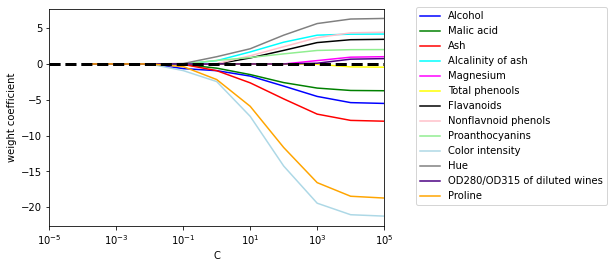

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors = [
    'blue', 'green', 'red', 'cyan',
    'magenta', 'yellow', 'black',
    'pink', 'lightgreen', 'lightblue',
    'gray', 'indigo', 'orange'
]

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(
        penalty='l1',
        C=10.0**c,
        solver='liblinear',
        random_state=0
    )
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(
        params, weights[:, column], 
        label=df_wine.columns[column+1], color=color
    )

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**(5)])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(
    loc='upper center', bbox_to_anchor=(1.38, 1.03),
    ncol=1, fancybox=True
)
plt.show()

In [23]:
# Sequential feature selection algorithms
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(
        self, estimator, k_features,
        scoring=accuracy_score, test_size=0.25,
        random_state=1
        ):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(
            X, y, test_size=self.test_size,
            random_state=self.random_state
        )
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(
            X_train, y_train, X_test, y_test,
            self.indices_
        )
        self.scores_ = [score]
        
        while dim > self.k_features:
            print("dim={}".format(dim), end=" ")
            scores = []
            subsets = []
            
            for p in combinations(
                self.indices_, r=dim-1
            ):
                score = self._calc_score(
                    X_train, y_train, X_test, 
                    y_test, p
                )
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            
            print(self.indices_)
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(
        self, X_train, y_train, X_test, y_test,
        indices
    ):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


In [24]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

dim=13 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)
dim=12 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12)
dim=11 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12)
dim=10 (0, 1, 2, 3, 6, 7, 8, 10, 12)
dim=9 (0, 1, 2, 3, 6, 8, 10, 12)
dim=8 (0, 1, 3, 6, 8, 10, 12)
dim=7 (0, 1, 3, 6, 10, 12)
dim=6 (0, 1, 3, 10, 12)
dim=5 (0, 1, 10, 12)
dim=4 (0, 1, 10)
dim=3 (0, 10)
dim=2 (0,)


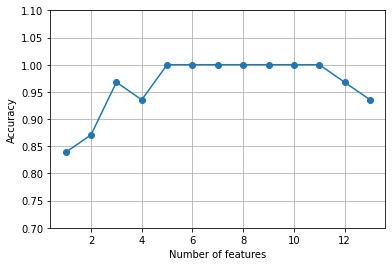

In [25]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [34]:
k5 = list(sbs.subsets_[8])
df_wine.columns[1:][k5]

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')

In [35]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


In [36]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


In [38]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(
    n_estimators=10000, random_state=0, n_jobs=-1
)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('{}) {}\t{}'.format(
        f + 1,
        feat_labels[f],
        importances[indices[f]]
    ))


1) Alcohol	0.18248261633081472
2) Malic acid	0.1586097743920862
3) Ash	0.1509479479780387
4) Alcalinity of ash	0.13198679742764793
5) Magnesium	0.10658906122519356
6) Total phenools	0.07824278809689272
7) Flavanoids	0.060717598651490706
8) Nonflavnoid phenols	0.03203319120917422
9) Proanthocyanins	0.02539967832538343
10) Color intensity	0.022351122470445448
11) Hue	0.02207807404077187
12) OD280/OD315 of diluted wines	0.014645160876579357
13) Proline	0.013916188975481143


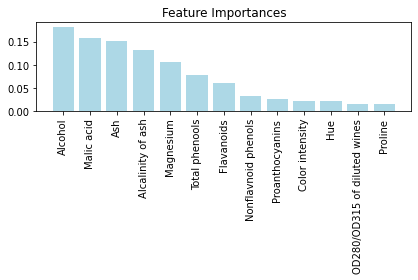

In [39]:
plt.title('Feature Importances')
plt.bar(
    range(X_train.shape[1]),
    importances[indices],
    color='lightblue',
    align='center'
)
plt.xticks(
    range(X_train.shape[1]),
    feat_labels, rotation=90
)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()